In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torch.optim import Adam

import matplotlib.pyplot as plt

from emoclass import *

In [2]:
NUM_CLASSES = len(emocat)
IMG_SIZE = 128
BATCH_SIZE = 8

folder_path = '/home/studenti/ballerini/datasets/RAVDESS_frames'

face_dataset = FaceEmotionDataset(root_dir=folder_path,
                                    transform=transforms.Compose([
                                        Rescale(IMG_SIZE), 
                                        CenterCrop(IMG_SIZE), 
                                        ToTensor()
                                    ]))        

trainingset_len = len(face_dataset) // 100 * 90
testset_len = len(face_dataset) - trainingset_len

print('training set size: ', trainingset_len)
print('test set size: ', testset_len)

train_set, test_set = torch.utils.data.random_split(face_dataset, [trainingset_len, testset_len])

trainset_loader = DataLoader(train_set, batch_size=BATCH_SIZE,
                        shuffle=False, num_workers=20)

testset_loader = DataLoader(test_set, batch_size=BATCH_SIZE,
                        shuffle=False, num_workers=20)


dataset_loader = (trainset_loader, testset_loader)

training set size:  6480
test set size:  720


surprised


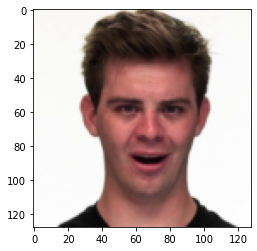

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Function to show the images
def imageshow(sample):
    plt.imshow(sample['image'].permute(1, 2, 0))
    print(emocat[sample['cat'].item()])
    
imageshow(train_set[0])

In [4]:
loss_fn = nn.CrossEntropyLoss()
model = EmoClassCNN(IMG_SIZE, NUM_CLASSES).double()

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("The model will be running on", device, "device")
# Convert model parameters and buffers to CPU or Cuda
model.to(device)

optimizer = Adam(model.parameters(), lr=0.001, weight_decay=0.0001)

The model will be running on cuda:0 device


In [6]:
training = False

if training:
    NUM_EPOCHS = 15 
    training_loss, test_loss = train(model, dataset_loader, loss_fn, optimizer, NUM_EPOCHS)
    print('Finished Training')
    epochs = range(0, NUM_EPOCHS)
    plt.plot(epochs, training_loss, 'g', label='Training loss')
    plt.plot(epochs, test_loss, 'b', label='Validation loss')
    plt.title('Training and Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
else:
    path = "../emoclassmodel.pth"
    model.load_state_dict(torch.load(path))

Accuracy:  96.80555555555556


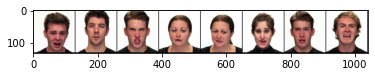

Real labels: fearful	neutral	angry	fearful	fearful	fearful	fearful	disgust
Predicted: fearful	neutral	angry	fearful	fearful	fearful	fearful	disgust


In [7]:
# Test which classes performed well
accuracy, _ = testAccuracy(model, testset_loader, loss_fn)
print('Accuracy: ', accuracy)

# Test with batch of images
testBatch(model, testset_loader)

Label:  angry
Prediction:  angry


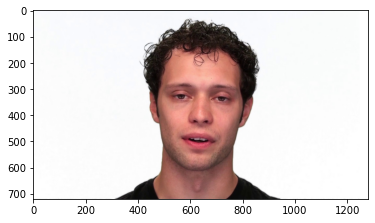

In [8]:
image, cat = getRandomImage(folder_path)

print('Label: ', emocat[cat])
print('Prediction: ', emocat[predict(model, image, IMG_SIZE)])

plt.imshow(image)